# LBP (Local Binary Pattern)影像處理範例

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1186%2F1687-6180-2014-182/MediaObjects/13634_2014_Article_725_Fig2_HTML.jpg" width=640></img><br>


In [18]:
#載入套件
import tensorflow as tf
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.backend import expand_dims

In [19]:
#讀取圖片
#img = cv.imread("./img/aoi_detect.jpg")
#img = cv.imread("./img/board.jpg",0)
#img = cv.imread("./img/polystyrene.jpg")
img = cv.imread("./img/lena_src.png",0)

In [20]:
#自訂一個秀圖片的函數
def showImage(image):
    '''
    在jupyter中使用matplotlib直接顯示圖片在記事本中
    '''
    # OpenCV的彩色影像 需轉成RGB順序
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        plt.imshow(image)
    # OpenCV的灰階影像 需要特別調整 plt.imshow 的參數
    if len(image.shape) == 2:
        plt.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=255)
    #plt.show()

(512, 512)


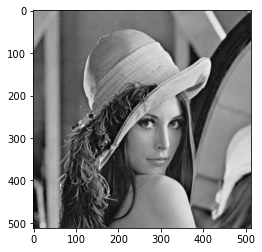

In [21]:
showImage(img)
print(img.shape)

In [22]:
#定義LBP演算法的函數
def lbp(img):
    assert(len(img.shape) == 2) # LBP只接受灰階影像
    ret = np.zeros_like(img)
    
    # 將圖片擴大，為了可以處理邊界
    img = cv.copyMakeBorder(img, 1, 1, 1, 1, cv.BORDER_REPLICATE)
    
    for y in range(1, img.shape[0] - 1):
        for x in range(1, img.shape[1] - 1):
            center = img[y][x]
            pixel = 0
            pixel |= (img[y - 1][x - 1] >= center) << 0
            pixel |= (img[y - 1][x + 0] >= center) << 1
            pixel |= (img[y - 1][x + 1] >= center) << 2
            pixel |= (img[y + 0][x + 1] >= center) << 3
            pixel |= (img[y + 1][x + 1] >= center) << 4
            pixel |= (img[y + 1][x + 0] >= center) << 5
            pixel |= (img[y + 1][x - 1] >= center) << 6
            pixel |= (img[y + 0][x - 1] >= center) << 7
            
            ret[y-1][x-1] = pixel
    return ret

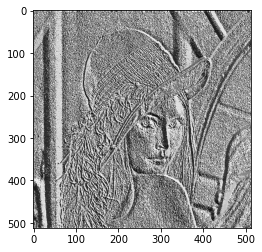

In [23]:
lbp = lbp(img)
showImage(lbp)

# Convolution

In [24]:
lbp = img_to_array(lbp) / 255
lbp = expand_dims(lbp, 0)

print(lbp.shape)

(1, 512, 512, 1)


(1, 512, 512, 1)


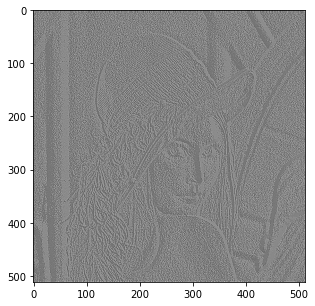

In [25]:
# Kernel Format: out_channels, in_channels, filter_height, filter_width
# (Good for design)
kernel = np.array([
                [0, -1, 0],
                [-1, 5, -1],
                [0, -1, 0]
])

# Rearange to: filter_height, filter_width, in_channels, output_channels
kernel = kernel.reshape((3, 3, 1, 1))

out = tf.nn.conv2d(lbp, kernel, strides=[1, 1, 1, 1], padding='SAME')
print(out.shape)
fig = plt.figure(figsize=(5, 5))
plt.imshow(out[0], cmap = 'gray')
plt.show()

# Max Pooling

(1, 256, 256, 1)


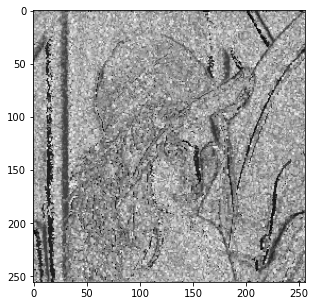

In [26]:
maxout = tf.nn.max_pool2d(out, ksize=3, strides=2, padding='SAME')

print(maxout.shape)
fig = plt.figure(figsize=(5, 5))
plt.imshow(maxout[0], cmap = 'gray')
plt.show()

# Convolution

In [27]:
lbp = img_to_array(maxout[0]) / 255
lbp = expand_dims(lbp, 0)

print(lbp.shape)

(1, 256, 256, 1)


(1, 256, 256, 1)


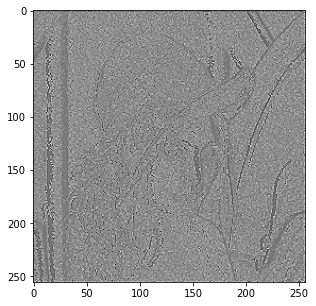

In [28]:
# Kernel Format: out_channels, in_channels, filter_height, filter_width
# (Good for design)
kernel = np.array([
                [0, -1, 0],
                [-1, 5, -1],
                [0, -1, 0]
])

# Rearange to: filter_height, filter_width, in_channels, output_channels
kernel = kernel.reshape((3, 3, 1, 1))

out = tf.nn.conv2d(lbp, kernel, strides=[1, 1, 1, 1], padding='SAME')
print(out.shape)
fig = plt.figure(figsize=(5, 5))
plt.imshow(out[0], cmap = 'gray')
plt.show()

# Max Pooling

(1, 128, 128, 1)


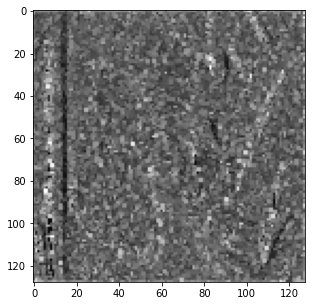

In [29]:
maxout = tf.nn.max_pool2d(out, ksize=3, strides=2, padding='SAME')

print(maxout.shape)
fig = plt.figure(figsize=(5, 5))
plt.imshow(maxout[0], cmap = 'gray')
plt.show()